<a href="https://colab.research.google.com/github/Nandana-2005/Flight_delay_management_ML_proj/blob/main/Flight_delay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("./drive/MyDrive/Smart_Bridge_Project/flightdata.csv")
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [ ]:
#df.describe() #this is only for numerical columns
df.describe(include='all')

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231,11231,11231.000000,11231.000000,11231,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
unique,NaN,NaN,NaN,NaN,NaN,1,789,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,DL,N857DZ,NaN,NaN,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,11231,76,NaN,NaN,3100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2016.0,2.544475,6.628973,15.790758,3.960199,NaN,NaN,1334.325617,12334.516695,NaN,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,NaN,NaN,811.875227,1595.026510,NaN,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,NaN,NaN,7.000000,10397.000000,NaN,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,NaN,NaN,624.000000,10397.000000,NaN,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,NaN,NaN,1267.000000,12478.000000,NaN,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,NaN,NaN,2032.000000,13487.000000,NaN,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN


In [ ]:
rows, columns = df.shape
print("Rows:", rows)
print("Columns:", columns)
#This implies that there are 11231 records and 26 unique features

Rows: 11231
Columns: 26


In [ ]:
#column names of the dataset
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25'],
      dtype='object')

In [ ]:
#checking for null values
df.isnull().sum()

,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
UNIQUE_CARRIER,0
TAIL_NUM,0
FL_NUM,0
ORIGIN_AIRPORT_ID,0
ORIGIN,0


<Axes: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

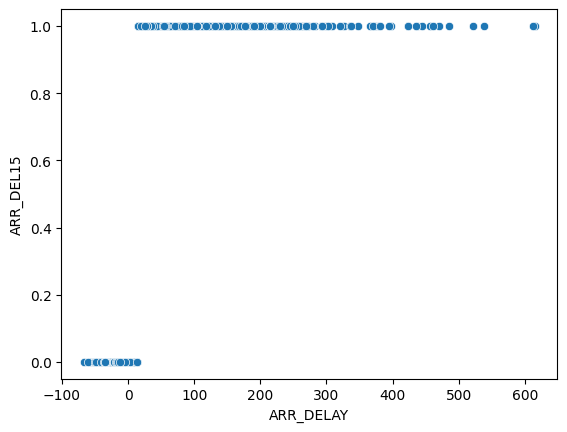

In [ ]:
sns.scatterplot(data=df,x='ARR_DELAY',y='ARR_DEL15')

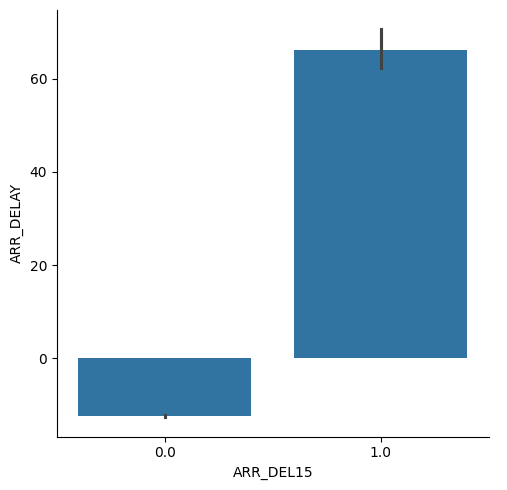

In [ ]:
sns.catplot(data=df,x='ARR_DEL15',y='ARR_DELAY',kind = 'bar')

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'QUARTER'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY_OF_MONTH'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'FL_NUM'}>,
        <Axes: title={'center': 'ORIGIN_AIRPORT_ID'}>,
        <Axes: title={'center': 'DEST_AIRPORT_ID'}>,
        <Axes: title={'center': 'CRS_DEP_TIME'}>,
        <Axes: title={'center': 'DEP_TIME'}>],
       [<Axes: title={'center': 'DEP_DELAY'}>,
        <Axes: title={'center': 'DEP_DEL15'}>,
        <Axes: title={'center': 'CRS_ARR_TIME'}>,
        <Axes: title={'center': 'ARR_TIME'}>,
        <Axes: title={'center': 'ARR_DELAY'}>],
       [<Axes: title={'center': 'ARR_DEL15'}>,
        <Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'DIVERTED'}>,
        <Axes: title={'center': 'CRS_ELAPSED_TIME'}>,
        <Axes: title={'center': 'ACTUAL_ELAPSED_TIME'}>],
       [<Axes: title={'center':

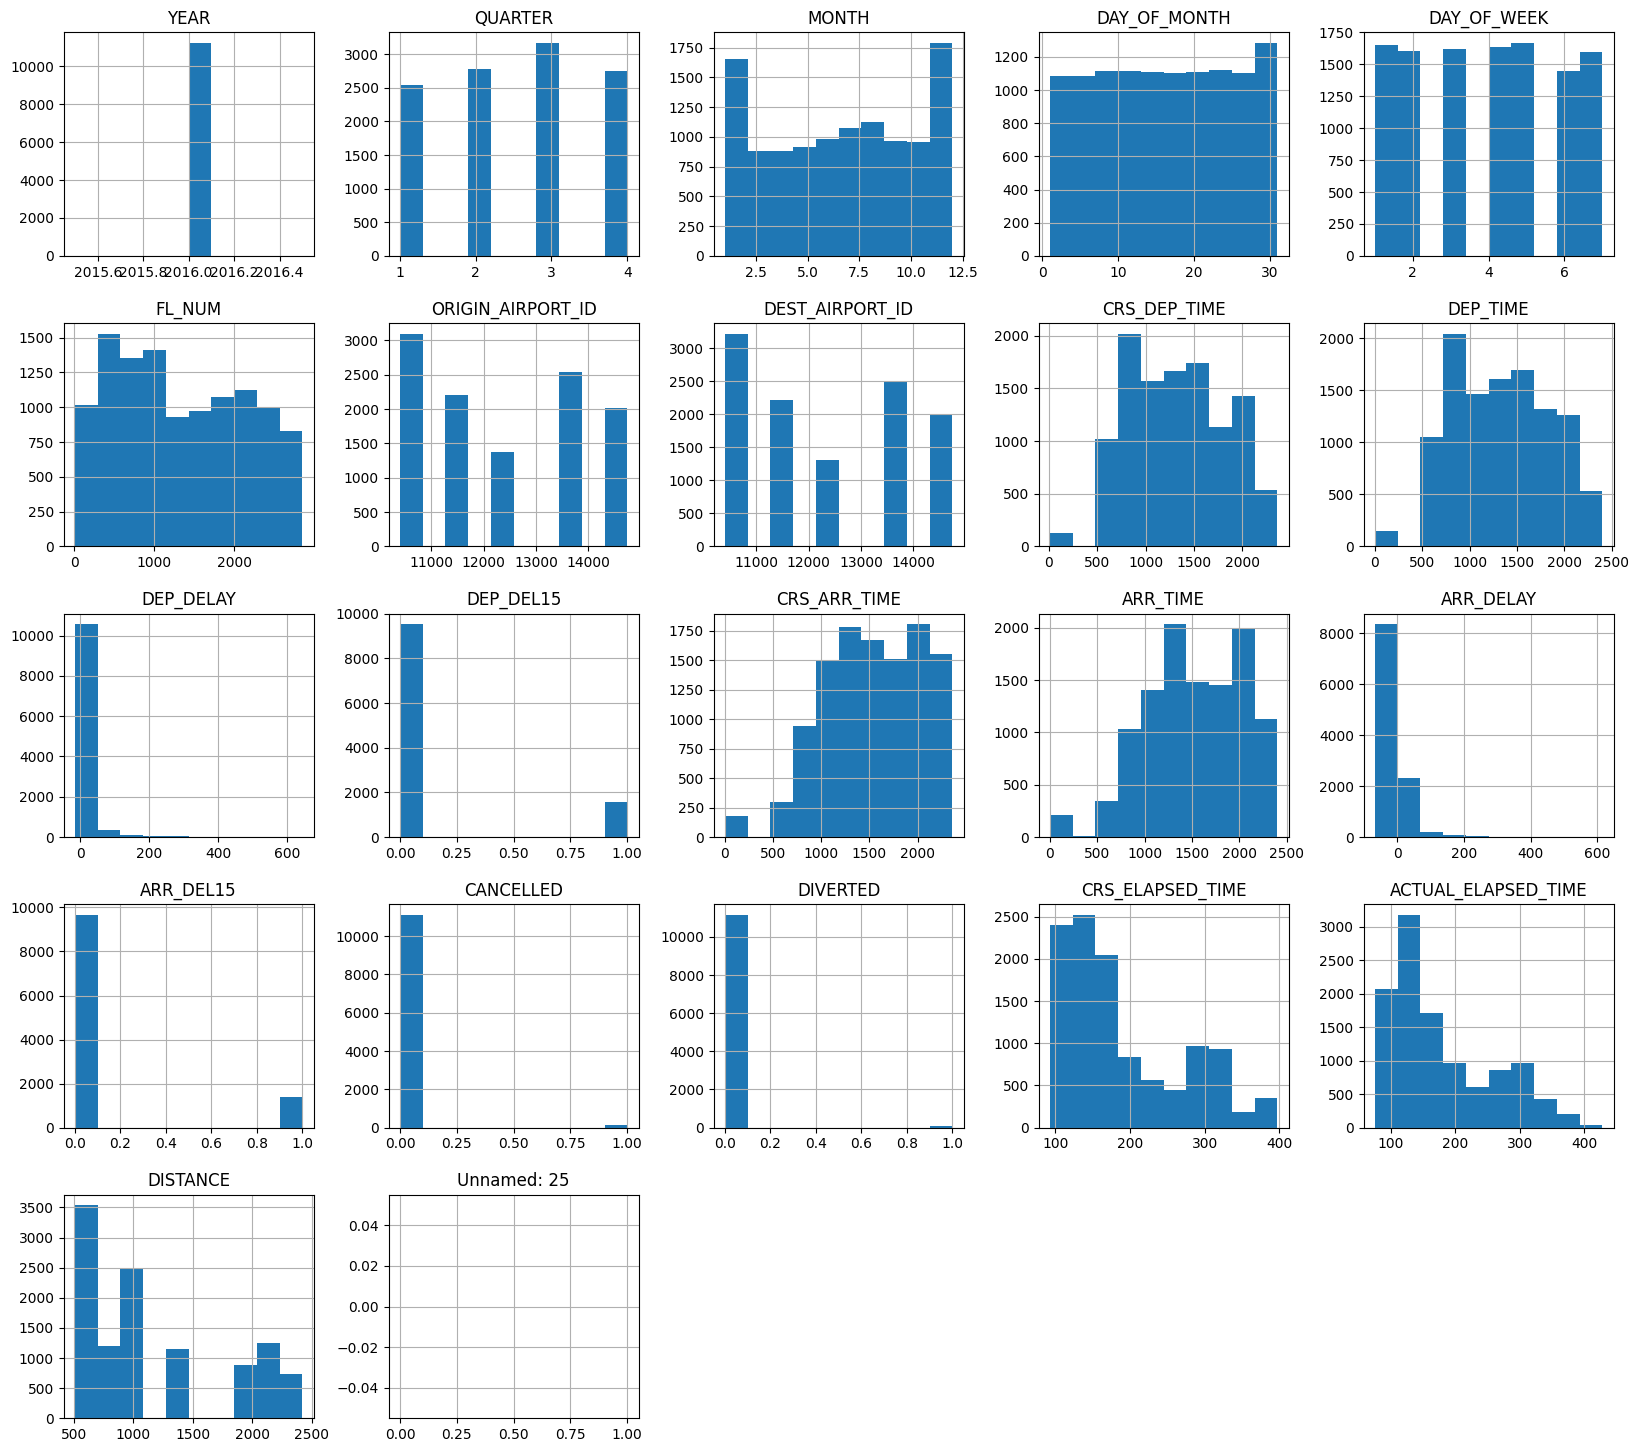

In [ ]:
#Plotting histograms for numerical columns to understand distribution
df.hist(figsize=(20,18))

In [ ]:
df['ORIGIN'].unique()

array(['ATL', 'DTW', 'SEA', 'MSP', 'JFK'], dtype=object)

In [ ]:
df['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [ ]:
df['ARR_DEL15'].unique()

array([ 0.,  1., nan])

<ipython-input-73-2213896537>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DEST', y='ARR_DEL15', data=df, palette='viridis')


<Axes: xlabel='DEST', ylabel='ARR_DEL15'>

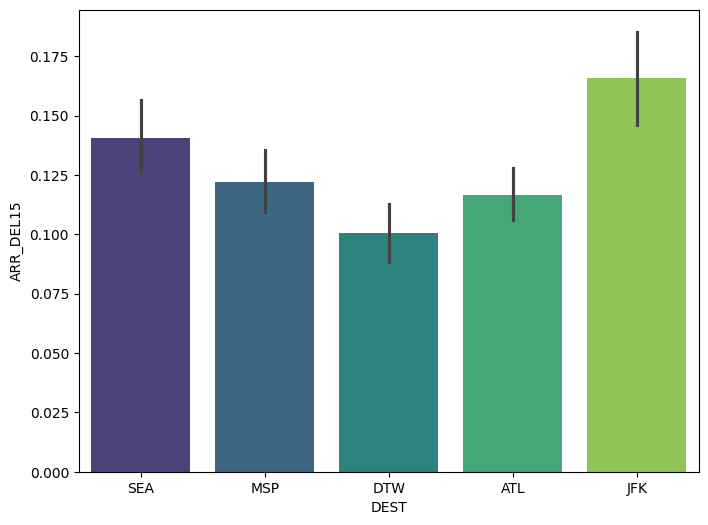

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='DEST', y='ARR_DEL15', data=df, palette='viridis')

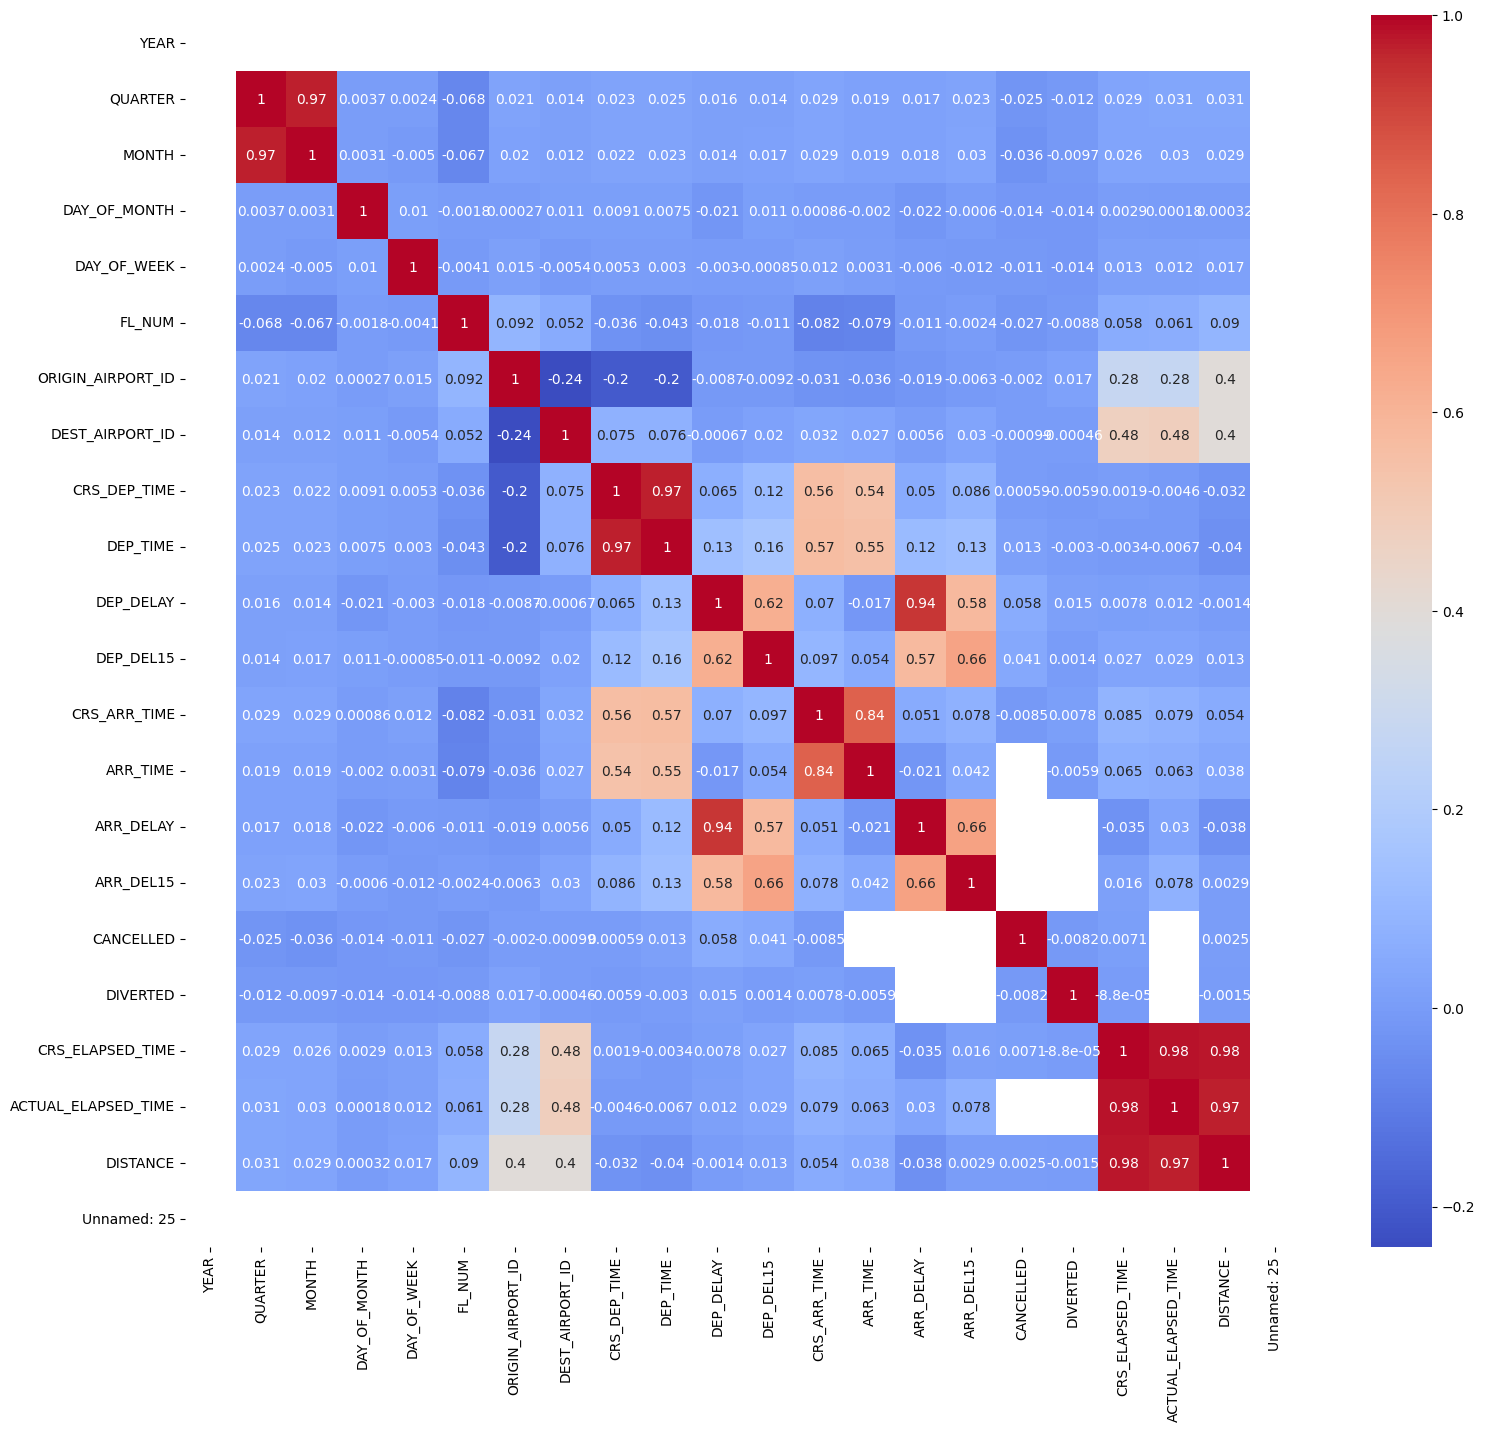

In [ ]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize = (18, 16))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
#Understanding from the heatmap we can conclude that ceratin columns are highly correlated and need to be dropped
#Several unamed columns with null values dropped
df = df.drop(columns=['YEAR','DEST_AIRPORT_ID','DEP_TIME','Unnamed: 25'])
df.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,1,1,1,5,DL,N836DN,1399,10397,ATL,SEA,...,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0
1,1,1,1,5,DL,N964DN,1476,11433,DTW,MSP,...,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0
2,1,1,1,5,DL,N813DN,1597,10397,ATL,SEA,...,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0
3,1,1,1,5,DL,N587NW,1768,14747,SEA,MSP,...,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0
4,1,1,1,5,DL,N836DN,1823,14747,SEA,DTW,...,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0


In [ ]:
#df['TAIL_NUM'].unique().size = 789 which is vastly unique thus can be removed from the df for training
#df['UNIQUE_CARRIER'] is DL constantly across the dataset so does not affect the model
#df['ORIGIN'] and df['ORIGIN_AIRPORT_ID'] are equivalent and thus origin can be removed since ID id numerical and a best column for model training
#df['DEST'] and df['DEST_AIRPORT_ID'] are equivalent

In [ ]:
#Only Highly significant Columns are considered for model training
df = df[["FL_NUM", "UNIQUE_CARRIER","MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME","ARR_DEL15"]]
df.isnull().sum()

,0
FL_NUM,0
UNIQUE_CARRIER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
ORIGIN,0
DEST,0
CRS_ARR_TIME,0
ARR_DEL15,188


In [ ]:
#The null values are 1.6% of the columns so we can drop the records
df.dropna(subset=['ARR_DEL15'], inplace=True)

In [ ]:
import math

for index,row in df.iterrows():
  df.loc[index,'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME']/100)
df.head()

,FL_NUM,UNIQUE_CARRIER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,ARR_DEL15
0,1399,DL,1,1,5,ATL,SEA,21,0.0
1,1476,DL,1,1,5,DTW,MSP,14,0.0
2,1597,DL,1,1,5,ATL,SEA,12,0.0
3,1768,DL,1,1,5,SEA,MSP,13,0.0
4,1823,DL,1,1,5,SEA,DTW,6,0.0


In [ ]:
#4 categories of airports are encoded
le = LabelEncoder()
df['DEST'] = le.fit_transform(df['DEST'])
df['ORIGIN'] = le.fit_transform(df['ORIGIN'])
df['UNIQUE_CARRIER'] = le.fit_transform(df['UNIQUE_CARRIER'])

In [ ]:
df.head(5)

,FL_NUM,UNIQUE_CARRIER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,ARR_DEL15
0,1399,0,1,1,5,0,4,21,0.0
1,1476,0,1,1,5,1,3,14,0.0
2,1597,0,1,1,5,0,4,12,0.0
3,1768,0,1,1,5,4,3,13,0.0
4,1823,0,1,1,5,4,1,6,0.0


In [ ]:
# Both these columns have no inherent order.This way, the model treats each airport as a separate entity, with no implied order or hierarchy.
df = pd.get_dummies(df,columns = ['ORIGIN','DEST'])
df = df.astype(int)
df.head()

,FL_NUM,UNIQUE_CARRIER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,0,1,1,5,21,0,1,0,0,0,0,0,0,0,0,1
1,1476,0,1,1,5,14,0,0,1,0,0,0,0,0,0,1,0
2,1597,0,1,1,5,12,0,1,0,0,0,0,0,0,0,0,1
3,1768,0,1,1,5,13,0,0,0,0,0,1,0,0,0,1,0
4,1823,0,1,1,5,6,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
#Features and traget
X = df.drop('ARR_DEL15', axis=1)
y = df['ARR_DEL15']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model_0 = DecisionTreeClassifier(random_state=0)
model_0.fit(X_train,y_train)
y_pred = model_0.predict(X_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Accuracy Score :  0.7953825260298778


In [ ]:
model_lr = LogisticRegression(C=1.0,n_jobs=-1,verbose=1, random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Logistic Regression Accuracy: 0.8886373924852875


In [ ]:

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8800362154821186


In [ ]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.8886373924852875


In [ ]:
'''model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))'''

KNN Accuracy: 0.8709823449524672


In [ ]:
'''model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))'''

Naive Bayes Accuracy: 0.8791308284291535
